# Notebook Instructions

1. All the <u>code and data files</u> used in this course are available in the downloadable unit of the <u>last section of this course</u>.
2. You can run the notebook document sequentially (one cell at a time) by pressing **shift + enter**. 
3. While a cell is running, a [*] is shown on the left. After the cell is run, the output will appear on the next line.

This course is based on specific versions of python packages. You can find the details of the packages in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>.

# Optimal Lookback and Holding Period

In the previous notebook, you have filtered out the securities, which shows trending behaviour that is Hurst value greater than 0.65. In this notebook, we will find an optimal lookback and holding period for those securities using correlation and p-value.
    
To do this, you will perform the following steps:

1. [Read prices from CSV file](#read)
2. [Calculate correlation coefficient and p-value](#correlation)
3. [Plot correlation coefficient and p-value](#plot_correlation)
4. [Optimal lookback and holding period](#optimal)
5. [Calculate strategy returns](#strategy)
6. [Optimal lookback and holding period for all securities](#optimal_all)
7. [Calculate strategy returns for all securities](#strategy_all)

<a id='read'></a> 
## Read data from CSV file

In [1]:
# Import the package pandas as pd
import pandas as pd

# The data is stored in the directory 'data'
path = '../data/'

# Read the csv file using read_csv method of pandas
prices = pd.read_csv(path + 'security_prices_2000_2019.csv', index_col=0)

# Set the index to datetime
prices.index = pd.to_datetime(prices.index)

prices.tail()

,Gold,Silver,Crude Oil,Platinum,Corn,Sugar,Wheat,EUR-USD,USD-JPY,GBP-USD,...,GBP-EUR,S&P500,Dow Jones Industrial Average,NASDAQ,Russell 2000,TLT,TLH,IEF,IEI,SHY
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-26,142.380005,16.73,103.120003,89.510002,14.84,7.01,5.76,1.109545,109.369003,1.297353,...,1.16890,321.052124,283.575867,213.335373,166.037979,136.366409,143.870224,110.003388,125.000992,84.119888
2019-12-27,142.330002,16.58,103.279999,88.879997,14.88,7.05,5.82,1.110112,109.542000,1.300221,...,1.17085,320.972565,283.843536,213.155762,165.221146,136.515533,144.009445,110.162628,125.219879,84.179588
2019-12-30,142.630005,16.74,103.120003,90.129997,14.82,7.08,5.80,1.118230,109.428001,1.309192,...,1.17066,319.202972,282.059174,211.758743,164.802765,136.018463,143.691238,110.092964,125.249718,84.209435
2019-12-31,142.899994,16.68,102.480003,90.930000,14.80,7.02,5.85,1.120230,108.873001,1.311303,...,1.17039,319.978424,282.624176,212.157883,165.031876,134.686310,142.816101,109.694862,125.110435,84.199486
2020-01-01,142.899994,16.68,102.480003,90.930000,14.80,7.02,5.85,1.122083,108.681000,1.326260,...,1.18140,319.978424,282.624176,212.157883,165.031876,134.686310,142.816101,109.694862,125.110435,84.199486


<a id='correlation'></a> 
## Calculate correlation coefficient and p-value

We create a function and pass securities prices, lookback period and holding period as arguments. Inside the function, we do the following steps. 

1. Calculate the lookback returns
2. Calculate the hold returns
3. Use `pearsonr` function from scipy libray and pass lookback and hold returns to calculate correlation coefficient and p-value.

Syntax:
```python
from scipy.stats import pearsonr
pearsonr(x,y)
```
Parameters:

    x: array_1
    y: array_2

Returns:

    Pearson's correlation coefficient, 2-tailed p-value

For more details on pearsonr function use this <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html" target="_blank"> link</a>. 

In [2]:
# Import numpy
import numpy as np

# Import pearsonr from scipy.stats
from scipy.stats import pearsonr

def calc_corr(data, l, h):

    # Calculate lookback returns
    data['lookback_returns'] = data['price'].pct_change(l)
    
    # Calculate hold returns
    data['future_hold_period_returns'] = data['price'].pct_change(h).shift(-h)
    
    data = data.dropna()
    data = data.iloc[::h]
    
    # Calculate correlation coefficient and p-value
    corr, p_value = pearsonr(data.lookback_returns,
                             data.future_hold_period_returns)
    return corr, p_value

<a id='plot_correlation'></a> 
## Plot correlation coefficient and p-value

We use heatmap to plot the values of correlation coefficient and p-value. The heatmap is a way of representing the data in a 2-dimensional form. The goal of the heatmap is to provide a colored visual summary of the data values.

To create heatmap, we use the seaborn library.

Syntax:
```python
import matplotlib.pyplot 
import seaborn
seaborn.heatmap(data, cmap, annot, vim, vmax, xticklabels, yticklabels)

```
Parameters:

    data: 2-dimensional array
    cmap: list of colors to map data values to colour space
    annot: to write the data values in each cell
    vmin, vmax: values to anchor the colormap
    xticklabels, yticklabels: to write the column names of the dataframe

Returns:

    Axes object with the heatmap

For more details on seaborn heatmap function use this <a href="https://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank"> link</a>.

In [3]:
# Import matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
plt.style.use('seaborn-darkgrid')

def plot_grid(data_to_plot, vmin, vmax, cmap, title_name):

    # Plot heatmap and set the style
    fig, ax = plt.subplots(figsize=(10, 7))
    ax = seaborn.heatmap(data_to_plot, cmap=cmap,
                         annot=True, vmin=vmin, vmax=vmax, xticklabels=hold, yticklabels=lookback)
    
    # Adjust top and bottom y-axis
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)

    # Label the heatmap
    plt.title(title_name, fontsize=14)
    plt.xlabel('Hold', fontsize=12)
    plt.ylabel('Lookback', fontsize=12)
    plt.show()

<a id='optimal'></a> 
## Optimal lookback and holding period 

To calculate the correlation coefficient and p-value, we will do the following steps.
1. Define lookback and holding period
2. Create a dataframe which stores the price of a security
3. Create two arrays which store the values of correlation and p-value for different lookback and holding period
4. Call `calc_corr` function and pass security price, lookback and holding period as arguments

In [4]:
# Define lookback periods
lookback = [15, 30, 60, 90, 150, 240, 360]

# Define holding periods
hold = [5, 10, 15, 30, 45, 60]

# Create a dataframe which stores price of a security
crude_data = pd.DataFrame()
crude_data['price'] = prices['Crude Oil']

# Create an array of length lookback*hold
corr_grid = np.zeros((len(lookback), len(hold)))
p_value_grid = np.zeros((len(lookback), len(hold)))

# Run through a length of lookback and holding periods
for i in range(len(lookback)):
    for j in range(len(hold)):

        # Call calc_corr function and calculate correlation coefficient and p-value
        corr_grid[i][j], p_value_grid[i][j] = calc_corr(
            crude_data, lookback[i], hold[j])

### Plot correlation coefficient 

We will call the `plot_grid` function to plot the correlation coefficient heatmap.

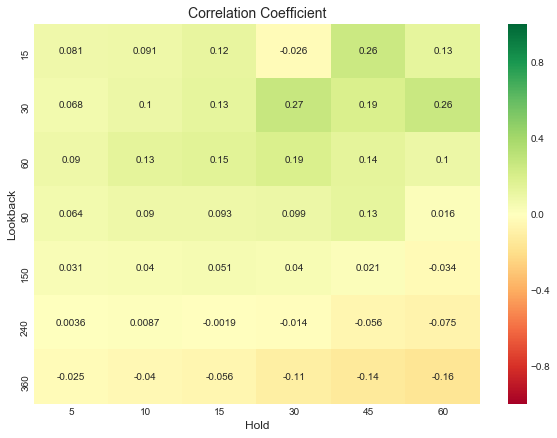

Lookback Optimal: 30
Hold Optimal: 30


In [5]:
# Call plot_grid function and plot correlation cofficient
plot_grid(corr_grid, vmin=-1, vmax=1, cmap='RdYlGn',
          title_name='Correlation Coefficient')

# Find maximum value of correlation coefficient
opt = np.where(corr_grid == np.max(corr_grid))

# Find the optimal lookback and holding period
opt_lookback = lookback[opt[0][0]]
opt_hold = hold[opt[1][0]]
print('Lookback Optimal:', opt_lookback)
print('Hold Optimal:', opt_hold)

As you can observe in the heatmap, with each value of lookback and holding period, there is a value of correlation coefficient. For example, with holding period of 5 and lookback period of 360, the correlation coefficient is -0.025. 

If the value of the correlation coefficient is highly positive between lookback(past) and hold(future) returns, then past and future returns are positively correlated. This means that if the past returns are positive, future returns are also positive, and if past returns are negative, future returns are also negative. Therefore, we will choose the highest positive correlation coefficient.

In the heatmap, you can see that holding period of 30 and lookback period of 30 has the highest correlation coefficient, that is 0.27. Therefore 0.27 is the optimal lookback and holding period for Crude oil.

### Plot p-value

Now we will call `plot_grid` function to plot the p-value heatmap.

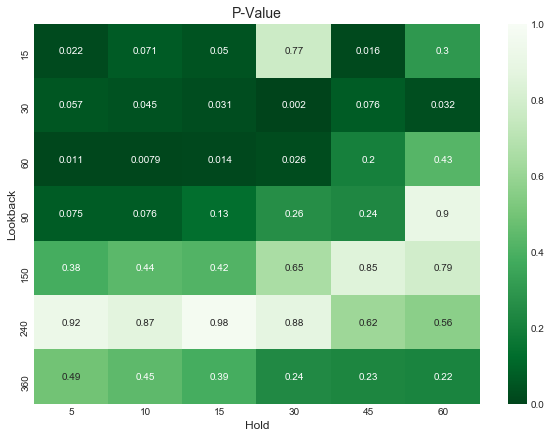

In [6]:
# Call plot_grid function and plot p-value
plot_grid(p_value_grid, vmin=0, vmax=1, cmap='Greens_r', title_name='P-Value')

The p-value is used to confirm that the relationship between lookback and hold returns are not observed by chance. We will use p-value of 0.1 to reject the null hypothesis and conclude that the correlation is statistically significant. Therefore, only lookback and holding periods with p-value less than 0.1 should be considered.

Among all p-values less than 0.1, the maximum value of correlation is 0.27 (from correlation coefficient heatmap) for <b>lookback period of 30 and holding period of 30</b>.

<a id='strategy'></a> 
## Calculate Strategy Returns

We have found the optimal lookback and holding period for crude oil. Now, we will calculate strategy returns as done in the time series momentum strategy. The steps are:

1. Calculate returns over a lookback period
2. Calculate future returns over a holding period
3. Define strategy logic<br>
    3.1 Buy when lookback returns are greater than 0<br>
    3.2 Sell when lookback returns are less than 0<br>
4. Calculate Strategy returns

In [7]:
def calc_returns(data, l, h, title_name):

    # Calculate returns over a lookback period
    data['lookback_returns'] = data['price'].pct_change(l)

    # Calculate future returns
    data['future_hold_period_returns'] = data['price'].pct_change(h).shift(-h)

    # Define strategy logic
    data['positions'] = np.where(data['lookback_returns'] > 0, 1, -1)

    data = data.dropna()
    data = data.iloc[::h]

    # Calculate strategy returns
    data['strategy_returns'] = data['future_hold_period_returns'] * data['positions']
    cum_rets = (data['strategy_returns']+1).cumprod()
    
# ------------------------------------------------------------------------------------    

    # Calculate Sharpe ratio
    sharpe = (np.mean(data['strategy_returns']) /
              np.std(data['strategy_returns'])*((252/h)**0.5))
    print(title_name + ' Sharpe Ratio:', sharpe)

# ------------------------------------------------------------------------------------    

    # Plot and lable the graphs
    fig = plt.figure(figsize=(16, 7))    
    sub = fig.add_subplot(1, 2, 1)
    cum_rets.plot()
    sub.set_ylabel('Cumulative Returns', fontsize=12)
    sub.set_xlabel('Date', fontsize=12)
    
# ------------------------------------------------------------------------------------        

    # Calculate the running maximum
    running_max = np.maximum.accumulate(cum_rets.dropna())
    # Ensure the value never drops below 1
    running_max[running_max < 1] = 1
    # Calculate the percentage drawdown
    drawdown = ((cum_rets)/running_max - 1)

    # Plot drawdown
    sub = fig.add_subplot(1, 2, 2)    
    drawdown.plot(color='r') 
    sub.set_ylabel('Returns',fontsize=12)
    sub.set_xlabel('Date',fontsize=12)
    plt.show()

Crude Oil Sharpe Ratio: 0.6026755170936183


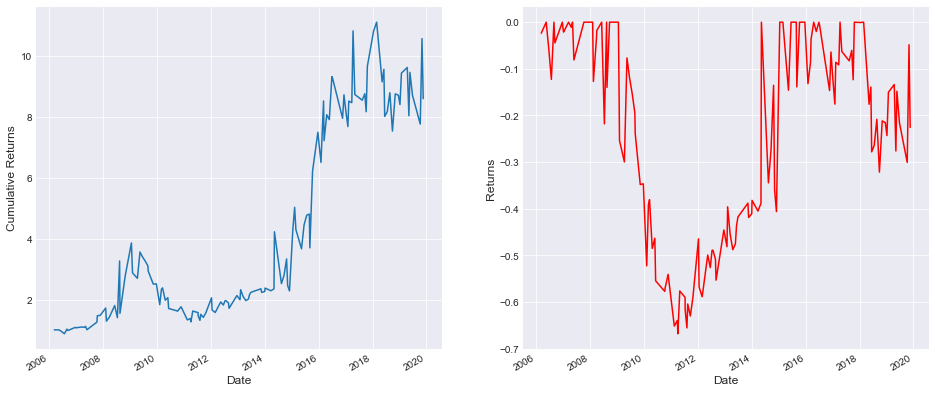

In [8]:
# Pass Crude oil data with optimal lookback and holding period
calc_returns(crude_data, 30, 30, 'Crude Oil')

The time series momentum strategy on Crude oil generated good returns over the backtesting period for optimal lookback of 30 days and hold of 30 days.

****

<a id='optimal_all'></a> 
## Optimal lookback and holding period for all securities

We will calculate the correlation coefficient and p-value for all securities that have high Hurst value.

In [9]:
# Create a dataframe which stores the correlation coefficient and p-value
corr_pvalue = pd.DataFrame()

# Create a dataframe which stores price data of all securities
data = pd.DataFrame()

# Securities with Hurst exponent greater than 0.65
price = prices[['Crude Oil', 'NASDAQ', 'SHY', 'Wheat', 'Gold', 'Sugar', 'IEF', 'Russell 2000',
                'IEI', 'S&P500', 'Dow Jones Industrial Average', 'Silver', 'Corn', 'TLH', 'TLT', 'USD-JPY']]

for column in price.columns:
    data['price'] = price[column]

    # Run through a length of lookback and holding period
    for i in range(len(lookback)):
        for j in range(len(hold)):

            # Calculate correlation coefficient and p-value
            corr, p_value = calc_corr(data, lookback[i], hold[j])

            # Append correlation and p-value in a dataframe
            corr_pvalue = corr_pvalue.append(
                [[column, lookback[i], hold[j], corr, p_value]])

corr_pvalue.columns = ['Instrument', 'Lookback',
                       'Hold', 'Correlation', 'P_value']

# Set index of corr_pvalue dataframe
corr_pvalue.reset_index(inplace=True, drop=True)
corr_pvalue.head()

,Instrument,Lookback,Hold,Correlation,P_value
0,Crude Oil,15,5,0.081360,0.021780
1,Crude Oil,15,10,0.090693,0.071065
2,Crude Oil,15,15,0.120492,0.050072
3,Crude Oil,15,30,-0.025718,0.769743
4,Crude Oil,15,45,0.256214,0.015974


### Filter securities based on correlation coefficient and p-value

We will filter securities which have correlation positive correlation and p-value less than 0.1. 


Syntax:
```python
DataFrame.loc[(condition_1)&(condition_2)...]
```

Parameter:

    condition_1: first condition to check

    condition_2: second condition to check
    
Return:
    
    Pandas DataFrame    

In [10]:
corr_pvalue_filtered = corr_pvalue.loc[(
    corr_pvalue['Correlation'] > 0) & (corr_pvalue['P_value'] < 0.1)]

corr_pvalue_filtered.head()

,Instrument,Lookback,Hold,Correlation,P_value
0,Crude Oil,15,5,0.081360,0.021780
1,Crude Oil,15,10,0.090693,0.071065
2,Crude Oil,15,15,0.120492,0.050072
4,Crude Oil,15,45,0.256214,0.015974
6,Crude Oil,30,5,0.067539,0.057450


### Lookback and hold period with the highest correlation
We will keep only those lookback and holding period for securities which have the highest correlation.

Syntax:

```python
DataFrame.groupby(['column_name1'])['column_name2'].max()
```
 
Parameters:

    column_name1: column you want to group by
    column_name2: column you want to perform function

Return:

    Series or DataFrame

In [11]:
# Keep lookback and holding period with highest correlation
max_correlation = corr_pvalue_filtered.groupby(
    ['Instrument'])['Correlation'].transform(max) == corr_pvalue_filtered['Correlation']


corr_pvalue_filtered[max_correlation]

,Instrument,Lookback,Hold,Correlation,P_value
9,Crude Oil,30,30,0.266490,0.002011
71,NASDAQ,150,60,0.195152,0.059441
125,SHY,360,60,0.400568,0.000279
340,IEI,15,45,0.183089,0.097568
380,S&P500,15,15,0.108672,0.032804
467,Silver,15,60,0.240030,0.052229
508,Corn,15,45,0.320113,0.011903


<a id='strategy_all'></a> 
## Calculate strategy returns for all securities

Crude Oil Sharpe Ratio: 0.6026755170936183


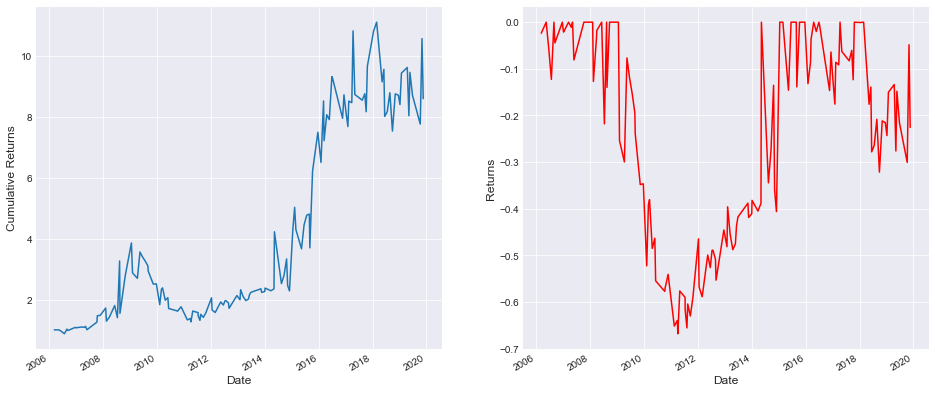

NASDAQ Sharpe Ratio: 0.20283290398158926


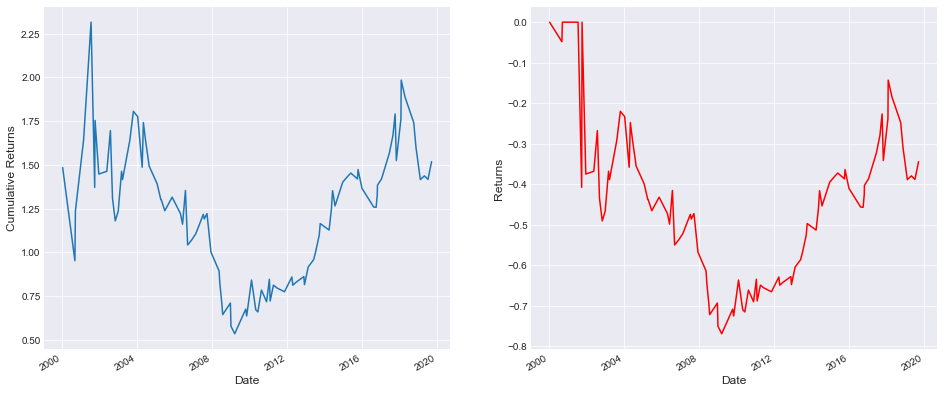

SHY Sharpe Ratio: 1.2218438432241998


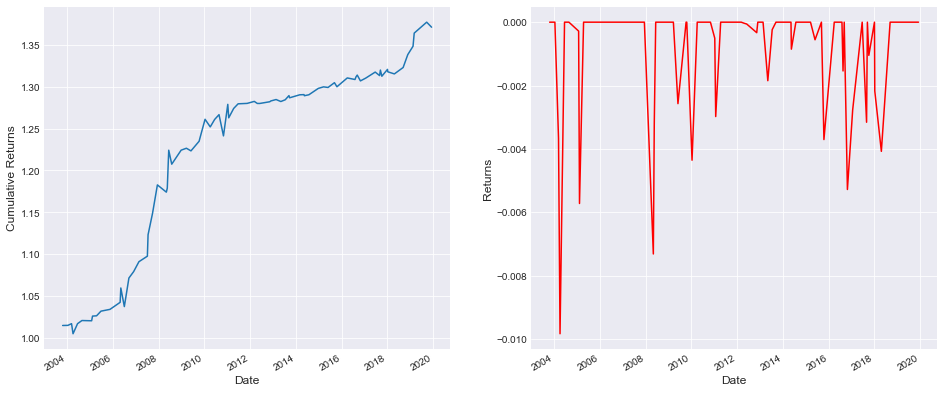

IEI Sharpe Ratio: 0.4364564693434743


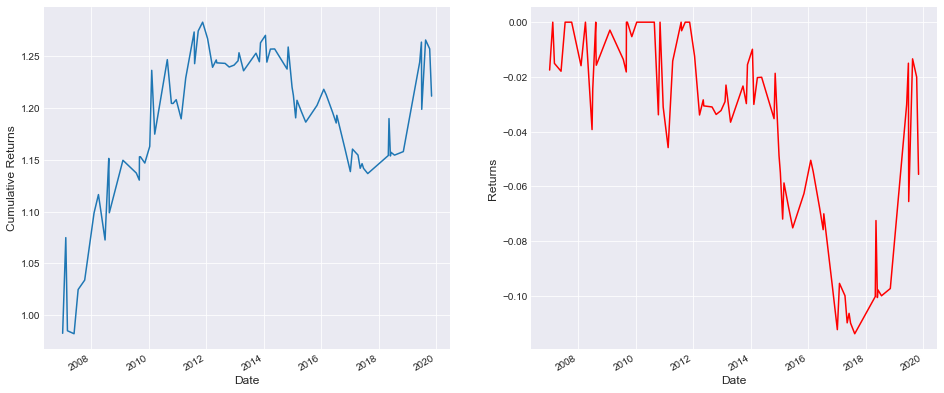

S&P500 Sharpe Ratio: 0.27856396653992743


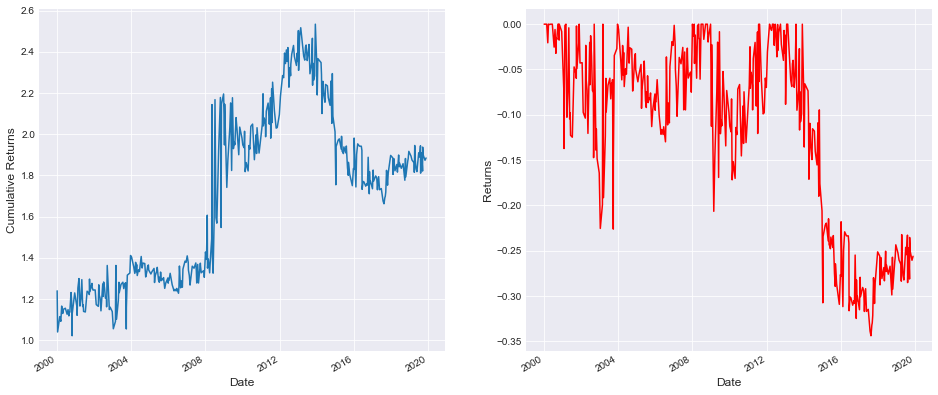

Silver Sharpe Ratio: 0.38909701552530296


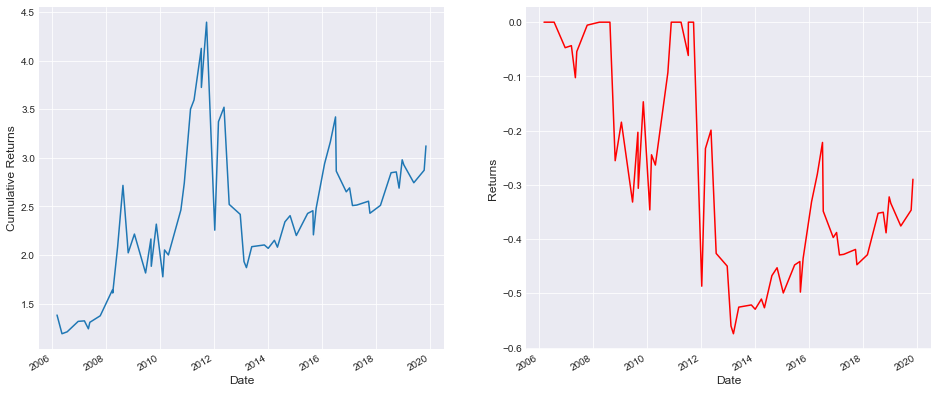

Corn Sharpe Ratio: 0.317976937553598


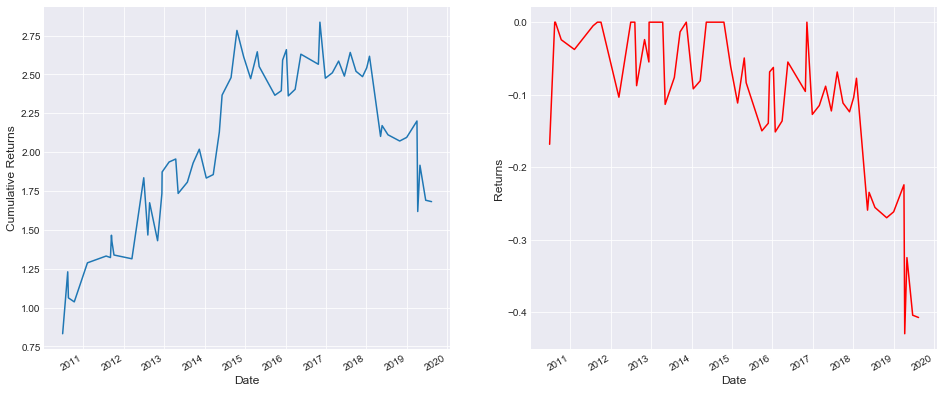

In [12]:
# Run through index of corr_pvalue_filtered[max_correlation] and call the 'calc_returns' function  
for i in corr_pvalue_filtered[max_correlation].index:

    instrument = corr_pvalue_filtered[max_correlation].loc[i, 'Instrument']
    lookback = corr_pvalue_filtered[max_correlation].loc[i, 'Lookback']
    hold = corr_pvalue_filtered[max_correlation].loc[i, 'Hold']
    data['price'] = price[instrument]
    
    calc_returns(data, lookback, hold, instrument)

As you can see, our strategy performed pretty well on the securities with high correlation between lookback and holding returns. Now let's conclude here with what you have learnt and what you can do more to improve the strategy.

Till now, you have learned to:
1. Find the nature of time series 
2. If trending, find optimal lookback and holding period using correlation analysis
3. Create time series momentum trading strategy

Now it's your chance to tweak the parameters and make the model better.
1. Backtest and try out the model on different securities
2. Backtest the model on multiple lookback and holding period
3. Use different values of correlation and p-value to filter out securities
4. Instead of fixed lookback period, try out dynamically changing lookback period, one that changes as a function of volatility (link available in the additional reading unit). 

That's all for the time series momentum strategy. In the upcoming sections, you will learn about cross-sectional momentum strategy and create trading strategies based on that concept.<br><br>

<b>References<b>: 
    
Ernest P. Chan, Algorithmic Trading: Winning Strategies and Their Rationale 